In [1]:
import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('advertising.csv')

In [3]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

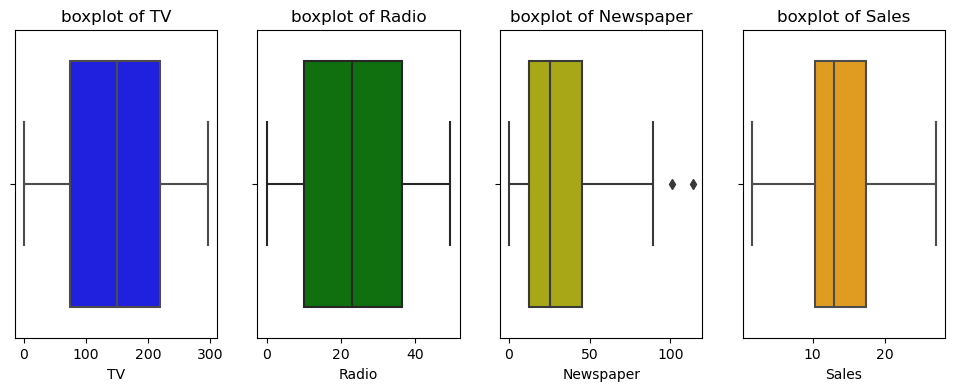

In [6]:
fig,axes=plt.subplots(1,4,figsize=(12,4))
colors=['b','g','y','orange']
for i,(column,color) in enumerate (zip(df.columns,colors)) :
    sns.boxplot(
        data=df,
        x=column,
        ax=axes[i],
        color=color
    )
    axes[i].set_title(f'boxplot of {column}')
plt.tight_layout
plt.show()

In [7]:
def outlier(df,column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    min_out=Q1-1.5*IQR
    max_out=Q3+1.5*IQR
    df.loc[ df[column] < min_out, column] = min_out
    df.loc[ df[column] > max_out, column] = max_out
    return df

In [8]:
columns=list(df.columns)

In [9]:
columns

['TV', 'Radio', 'Newspaper', 'Sales']

In [10]:
for i in df.columns:
    df=outlier(df,i)

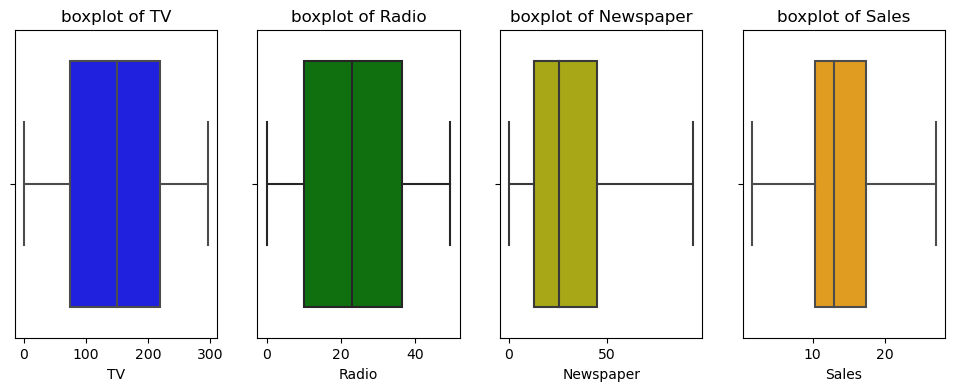

In [11]:
fig,axes=plt.subplots(1,4,figsize=(12,4))
colors=['b','g','y','orange']
for i,(column,color) in enumerate (zip(df.columns,colors)) :
    sns.boxplot(
        data=df,
        x=column,
        ax=axes[i],
        color=color
    )
    axes[i].set_title(f'boxplot of {column}')
plt.tight_layout
plt.show()

In [12]:
X=df[['TV','Radio','Newspaper']]
y=df[['Sales']]

In [13]:
display(X.head())
display(y.head())

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


,Sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [14]:
X.shape , y.shape

((200, 3), (200, 1))

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [17]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(140, 3)
(60, 3)
(140, 1)
(60, 1)


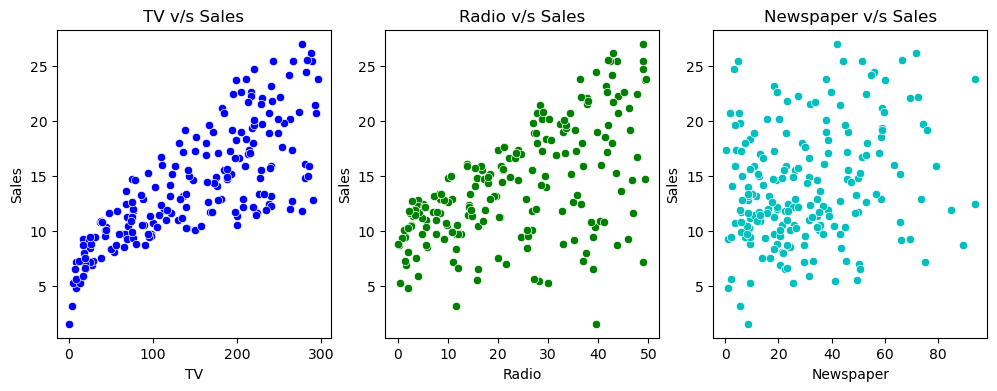

In [18]:
fig,axes = plt.subplots(1,3,figsize=(12,4))
colors=['b','g','c']
for i,(column,color) in enumerate (zip(X.columns,colors)):
    sns.scatterplot(
        x=X[column],
        y=y['Sales'],
        color=color,
        ax=axes[i]
    )
    axes[i].set_title(f'{column} v/s Sales')
plt.tight_layout
plt.show()

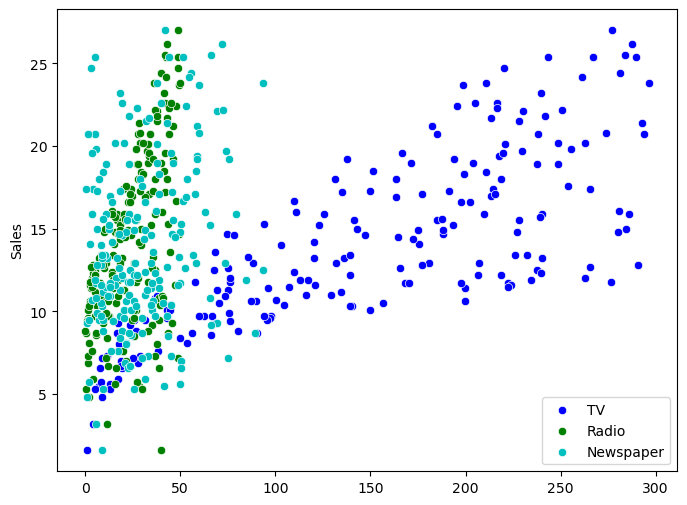

In [19]:
plt.figure(figsize=(8,6))
colors=['b','g','c']
for i,(column,color) in enumerate (zip(X.columns,colors)):
    sns.scatterplot(
        x=X[column],
        y=y['Sales'],
        color=color,
        label=f'{column}'
    )
plt.xlabel('')
plt.tight_layout
plt.show()

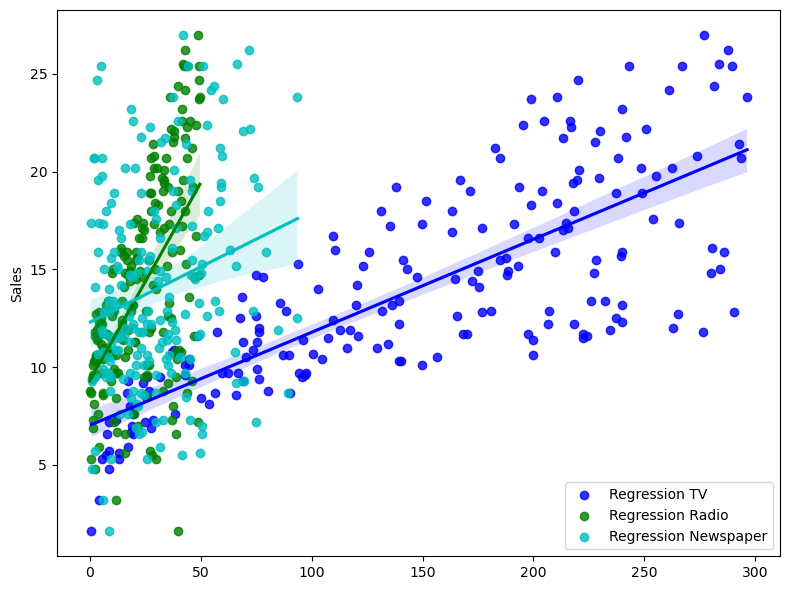

In [20]:
plt.figure(figsize=(8,6))
colors = ['b', 'g', 'c']
for i, (column, color) in enumerate(zip(X.columns, colors)):
    sns.regplot(
        x=X[column],
        y=y['Sales'],
        color=color,
        label= f'Regression {column}'
    )
plt.xlabel('')
plt.legend()
plt.tight_layout()
plt.show()

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [22]:
lr1 = LinearRegression()
lr1

LinearRegression()

In [23]:
lr1.fit(X_train,y_train)
lr1

LinearRegression()

In [24]:
w=lr1.coef_
b=lr1.intercept_

In [25]:
print(w)
print(b)

[[ 0.04469763  0.18760126 -0.00040542]]
[3.1529968]


In [26]:
y_train_pred=lr1.predict(X_train)
y_train_pred[:5]

array([[15.21380551],
       [24.04577944],
       [ 6.73401668],
       [19.95816355],
       [13.88024469]])

In [27]:
display(X_train.head())
display(y_train.head())

,TV,Radio,Newspaper
85,193.2,18.4,65.7
183,287.6,43.0,71.8
127,80.2,0.0,9.2
53,182.6,46.2,58.7
100,222.4,4.3,49.8


,Sales
85,15.2
183,26.2
127,8.8
53,21.2
100,11.7


In [28]:
display(X_test.head())

,TV,Radio,Newspaper
37,74.7,49.4,45.7
109,255.4,26.9,5.5
31,112.9,17.4,38.6
89,109.8,47.8,51.4
66,31.5,24.6,2.2


In [29]:
y_train_pred2=lr1.predict(X_test)
y_train_pred2[:5]

array([[15.74088401],
       [19.61301494],
       [11.44797163],
       [17.00729783],
       [ 9.17507108]])

In [30]:
display(y_test.head())

,Sales
37,14.7
109,19.8
31,11.9
89,16.7
66,9.5


In [31]:
print('MSE:', mean_squared_error(y_train, y_train_pred))

MSE: 3.008793109262773


Nhập số tiền chi cho TV 200
Nhập số tiền chi cho Radio 10
Nhập số tiền chi cho Newspaper 20


[[200.  10.  20.]]


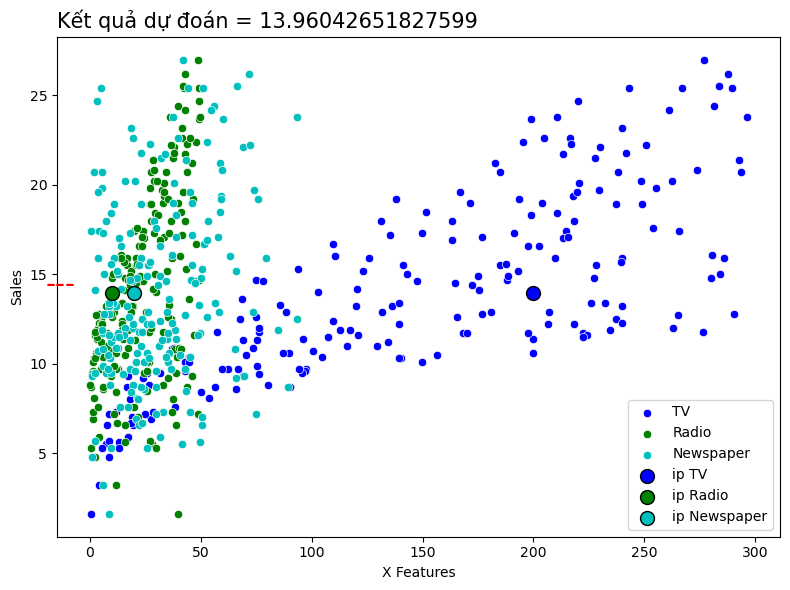

In [35]:
ip = np.array([200,10,45.7]).reshape(1,3)
for i,column in enumerate (X.columns):
    a=float(input(f'Nhập số tiền chi cho {column}'))
    ip[0][i]=a
colors = ['b', 'g', 'c']
plt.figure(figsize=(8, 6))
for i, (column, color) in enumerate(zip(X.columns, colors)):
    sns.scatterplot(
        x=X[column],
        y=y['Sales'],
        color=color,
        label=f'{column}'
    )
ip1=lr1.predict(ip)
for i, (column, color) in enumerate(zip(X.columns, colors)):
    plt.scatter(
        ip[0, i],
        ip1,
        color=color,
        edgecolor='black',
        s=100,
        label=f'ip {column}'
    )
plt.text(
    x=-20,
    y=ip1[0][0],
    s='---',
    color='red',
    size=20
)
print(ip)
plt.xlabel('X Features')
plt.ylabel('Sales')
plt.legend()
plt.title(f'Kết quả dự đoán = {ip1[0][0]}',loc='left', size=15)
plt.tight_layout()
plt.show()

In [33]:
print('Nguyễn Mạnh Khang')

Nguyễn Mạnh Khang
